# Regression Analysis

Regression analysis is suitable with the month as a categorical independent variable and the total spending as the dependent variable. This would determine if there are significant changes in spending over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from matplotlib.pyplot import figure
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/My Drive/Colab Notebooks/CS210 Term Project"
from os.path import join
%matplotlib inline

Mounted at ./drive


In [2]:
file_path = './drive/My Drive/Colab Notebooks/CS210 Term Project/project-data.csv'

df = pd.read_csv(file_path)

Testing the First Part of the Hypothesis: My spendings in total (without taking inflation into account) changes over the months
depending on the intensity of my academic life and the situations in my private life.

Creating the Table for Monthly Total Spendings

In [3]:
if 'Month_Total' not in df.columns:
    df['Month_Total'] = df.select_dtypes(include='number').sum(axis=1)

month_total_df = df[['Month', 'Month_Total']]

month_total_df

,Month,Month_Total
0,2022 December,3442.51
1,2023 January,6189.30
2,2023 February,7988.00
3,2023 March,8966.37
4,2023 April,8838.91
5,2023 May,4517.93
6,2023 June,6149.56
7,2023 July,5844.60
8,2023 August,7519.56
9,2023 September,8580.13


Calculating Slope, Intercept, and R-Squared

In [4]:
from sklearn.linear_model import LinearRegression

month_total_df_copy = month_total_df.copy()

month_total_df_copy['Month_Number'] = month_total_df_copy.index + 1

X = month_total_df_copy[['Month_Number']]
y = month_total_df_copy['Month_Total']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
std_deviation = month_total_df['Month_Total'].std()

r_squared = model.score(X, y)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-Squared: {r_squared}")
print(f"Standard Deviation: {std_deviation}")


Slope: 171.3777272727273
Intercept: 5805.640606060606
R-Squared: 0.11177974077269681
Standard Deviation: 1848.181021321226


In this calculation, months are considered as independent variable and monthly total spendings are considered as dependent variable. R-squared is 11.18% and standard deviation is approx. 1848.1810. This proves that other factors might have a significant influence on my spendings and the relationship between time (month) and spending is not strong.

Model of the Linear Regression

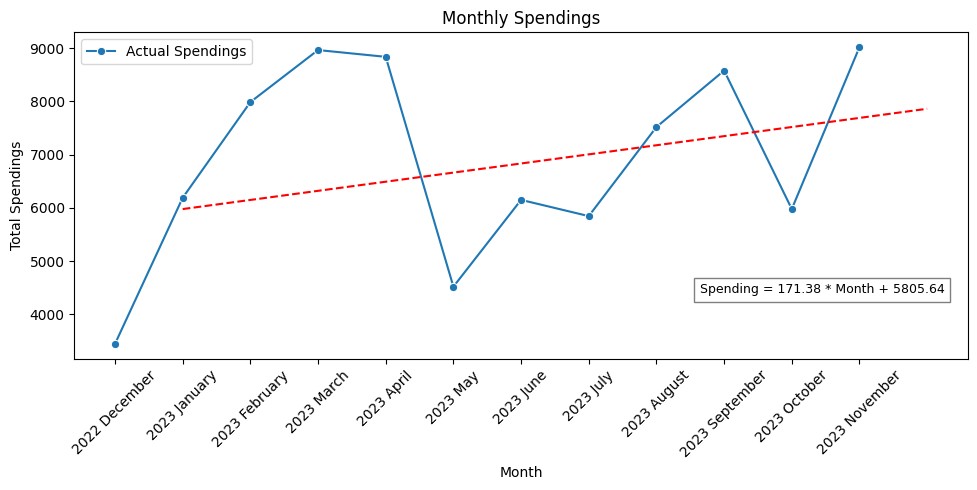

In [10]:
from sklearn.linear_model import LinearRegression

month_total_df = month_total_df.copy()

month_total_df['Month'] = pd.to_datetime(month_total_df['Month'], format='%Y %B')

month_total_df.sort_values('Month', inplace=True)

month_total_df['Month_Num'] = month_total_df.index + 1

X = month_total_df[['Month_Num']]
y = month_total_df['Month_Total']

model = LinearRegression()
model.fit(X, y)

month_total_df['Predicted_Total'] = model.predict(X)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Month', y='Month_Total', label='Actual Spendings', marker='o')

trendline_X_num = range(1, len(month_total_df) + 1)
trendline_y = model.predict(pd.DataFrame({'Month_Num': trendline_X_num}))

plt.plot(trendline_X_num, trendline_y, label='Trendline', linestyle='--', color='red')


slope = model.coef_[0]
intercept = model.intercept_
plt.text(0.7, 0.2, f'Spending = {slope:.2f} * Month + {intercept:.2f}',
         transform=plt.gca().transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

plt.xticks(rotation=45)
plt.title('Monthly Spendings')
plt.xlabel('Month')
plt.ylabel('Total Spendings')
plt.tight_layout()
plt.show()


As can be understood from this model, monthly expenses do not remain constant and change from month to month depending on the intensity of my life.

# Chi-Square Distribution

The reason for choosing this test is commonly used to determine whether there is a strong association between two categorical variables which is also discrete.

Testing the Second Part of the Hypothesis: The top
3 categories that I have spent the most does not change over the months mostly (over 50%).

Null Hypothesis: The distribution of spending across these categories is not consistent across months (less than 50%).

In [11]:
file_path = './drive/My Drive/Colab Notebooks/CS210 Term Project/project-data.csv'

df = pd.read_csv(file_path)

In [33]:
if 'Month_Total' not in df.columns:
    df['Month_Total'] = df.select_dtypes(include='number').sum(axis=1)

df

,Entertainment,Online Shopping,Clothing,Groceries,Healthcare,Dining,Personal Service,Subscription Services,Education,Home Maintenance,Misc,Month_Total
Month,,,,,,,,,,,,
2022 December,463.20,231.29,258.21,359.97,1482.84,647.00,NaN,NaN,NaN,NaN,NaN,3442.51
2023 January,1568.20,1425.71,992.00,NaN,NaN,1800.00,250.00,153.39,NaN,NaN,NaN,6189.30
2023 February,463.20,1902.64,2759.41,453.80,NaN,2210.57,NaN,153.39,44.99,NaN,NaN,7988.00
2023 March,1815.62,738.59,1723.99,645.19,749.14,1030.00,340.00,1494.34,NaN,129.5,300.00,8966.37
2023 April,2402.62,978.45,358.16,213.74,250.88,3337.92,NaN,745.23,NaN,NaN,551.91,8838.91
2023 May,NaN,646.88,358.16,154.04,1450.00,326.48,20.00,1332.37,230.00,NaN,NaN,4517.93
2023 June,1990.00,208.80,1504.44,404.19,NaN,232.99,17.94,1391.20,NaN,400.0,NaN,6149.56
2023 July,298.00,NaN,2691.23,904.37,NaN,185.00,NaN,1766.00,NaN,NaN,NaN,5844.60
2023 August,678.00,NaN,391.66,2398.34,NaN,1440.00,24.53,809.82,877.21,400.0,500.00,7519.56


Creating a Table to Present Every Month's Top 3 Most Spent Categories with Values

In [35]:
exclude_columns = ['Month_Total']

contingency_tables = {}

for month in df.index:
    month_data = df.loc[[month]].drop(exclude_columns, axis=1)

    top_3_categories = month_data.sum(axis=0).nlargest(3).index.tolist()

    contingency_table = month_data[top_3_categories]

    contingency_tables[month] = contingency_table

for month, contingency_table in contingency_tables.items():
    print(f"Contingency Table for {month}:\n{contingency_table}\n")


Contingency Table for 2022 December:
               Healthcare  Dining  Entertainment
Month                                           
2022 December     1482.84   647.0          463.2

Contingency Table for 2023 January:
              Dining  Entertainment  Online Shopping
Month                                               
2023 January  1800.0         1568.2          1425.71

Contingency Table for 2023 February:
               Clothing   Dining  Online Shopping
Month                                            
2023 February   2759.41  2210.57          1902.64

Contingency Table for 2023 March:
            Entertainment  Clothing  Subscription Services
Month                                                     
2023 March        1815.62   1723.99                1494.34

Contingency Table for 2023 April:
             Dining  Entertainment  Online Shopping
Month                                              
2023 April  3337.92        2402.62           978.45

Contingency Table for 2023 M

Finding the Top 3 Categories that Spent the Most Across the Months

In [37]:
category_sums = df.drop(columns=['Month_Total']).sum()

top_3_categories = category_sums.sort_values(ascending=False).head(3)

top_3_categories

Subscription Services    14744.43
Dining                   14515.45
Online Shopping          12348.25
dtype: float64

Right now, to reject the null hypothesis, we have to prove that the most spent 3 categories (which are Subscription Services, Dining, and Online Shopping) do not change mostly (over 50%) over the months.

Creating the Two-Way Table for Every Month vs. Top 3 Categories (Observed)

In [55]:
categories_of_interest = ['Subscription Services', 'Dining', 'Online Shopping']

two_way_table = pd.DataFrame(columns=categories_of_interest)

for month in df.index:
    top_3_categories = df.loc[month].nlargest(3).index.tolist()

    row = pd.Series(0, index=categories_of_interest)

    for category in categories_of_interest:
        if category in top_3_categories:
            row[category] = 1

    two_way_table.loc[month] = row

probabilities = two_way_table.mean()

two_way_table.loc['Column Total'] = two_way_table.sum()

two_way_table['Row Total'] = two_way_table.sum(axis=1)

print("Two-Way Table:")
print(two_way_table)

print("\nProbabilities of Each Category:")
print(probabilities)

Two-Way Table:
                Subscription Services  Dining  Online Shopping  Row Total
2022 December                       0       1                0          1
2023 January                        0       1                0          1
2023 February                       0       1                0          1
2023 March                          0       0                0          0
2023 April                          0       1                0          1
2023 May                            1       0                0          1
2023 June                           0       0                0          0
2023 July                           1       0                0          1
2023 August                         0       1                0          1
2023 September                      1       0                0          1
2023 October                        1       0                1          2
2023 November                       0       1                1          2
Column Total           

Calculating the Expected Counts


In [58]:
categories_of_interest = ['Subscription Services', 'Dining', 'Online Shopping']

expected_table = pd.DataFrame(columns=categories_of_interest)

for month in df.index:
    top_3_categories = df.loc[month].nlargest(3).index.tolist()

    row = pd.Series(0, index=categories_of_interest)

    for category in categories_of_interest:
        if category in top_3_categories:
            row[category] = 1

    expected_table.loc[month] = row

expected_table.loc['Column Total'] = expected_table.sum()

expected_table['Row Total'] = expected_table.sum(axis=1)

grand_total = expected_table['Row Total']['Column Total']

for column in categories_of_interest:
    for index in df.index:
        if index != 'Column Total':
            expected_count = (expected_table['Row Total'][index] * expected_table[column]['Column Total']) / grand_total
            expected_table.at[index, column] = round(expected_count, 2)

expected_table = expected_table.round(2)

print("Table with Expected Counts:")
print(expected_table)

Table with Expected Counts:
                Subscription Services  Dining  Online Shopping  Row Total
2022 December                    0.33     0.5             0.17          1
2023 January                     0.33     0.5             0.17          1
2023 February                    0.33     0.5             0.17          1
2023 March                       0.00     0.0             0.00          0
2023 April                       0.33     0.5             0.17          1
2023 May                         0.33     0.5             0.17          1
2023 June                        0.00     0.0             0.00          0
2023 July                        0.33     0.5             0.17          1
2023 August                      0.33     0.5             0.17          1
2023 September                   0.33     0.5             0.17          1
2023 October                     0.67     1.0             0.33          2
2023 November                    0.67     1.0             0.33          2
Column Tot

Applying the Chi-Square Distribution Test

In [64]:
from scipy.stats import chi2_contingency

categories_of_interest = ['Subscription Services', 'Dining', 'Online Shopping']

observed_table = pd.DataFrame(columns=categories_of_interest)

for month in df.index:
    top_3_categories = df.loc[month].nlargest(3).index.tolist()

    row = pd.Series(0, index=categories_of_interest)

    for category in categories_of_interest:
        if category in top_3_categories:
            row[category] = 1

    observed_table.loc[month] = row

observed_table = observed_table.loc[(observed_table != 0).any(axis=1), (observed_table != 0).any(axis=0)]

chi2, p, dof, expected = chi2_contingency(observed_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")
print()
print("Final result:")

#default value for alpha
alpha = 0.05

if p < alpha:
  print("Null hypothesis can be rejected.")
else:
  print("Null hypothesis cannot be rejected.")


Chi-squared Statistic: 15.500000000000002
Degrees of Freedom: 18
P-Value: 0.6273978676313473

Final result:
Null hypothesis cannot be rejected.


Eventhough, the top 3 categories occur more than half of the total categories, the null hypothesis cannot be rejected since the evidence is not enough to prove it.